<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1 - Get familiar with the dataset

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [7]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
boston_df.drop('Unnamed: 0', axis=1, inplace = True)

In [9]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [10]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


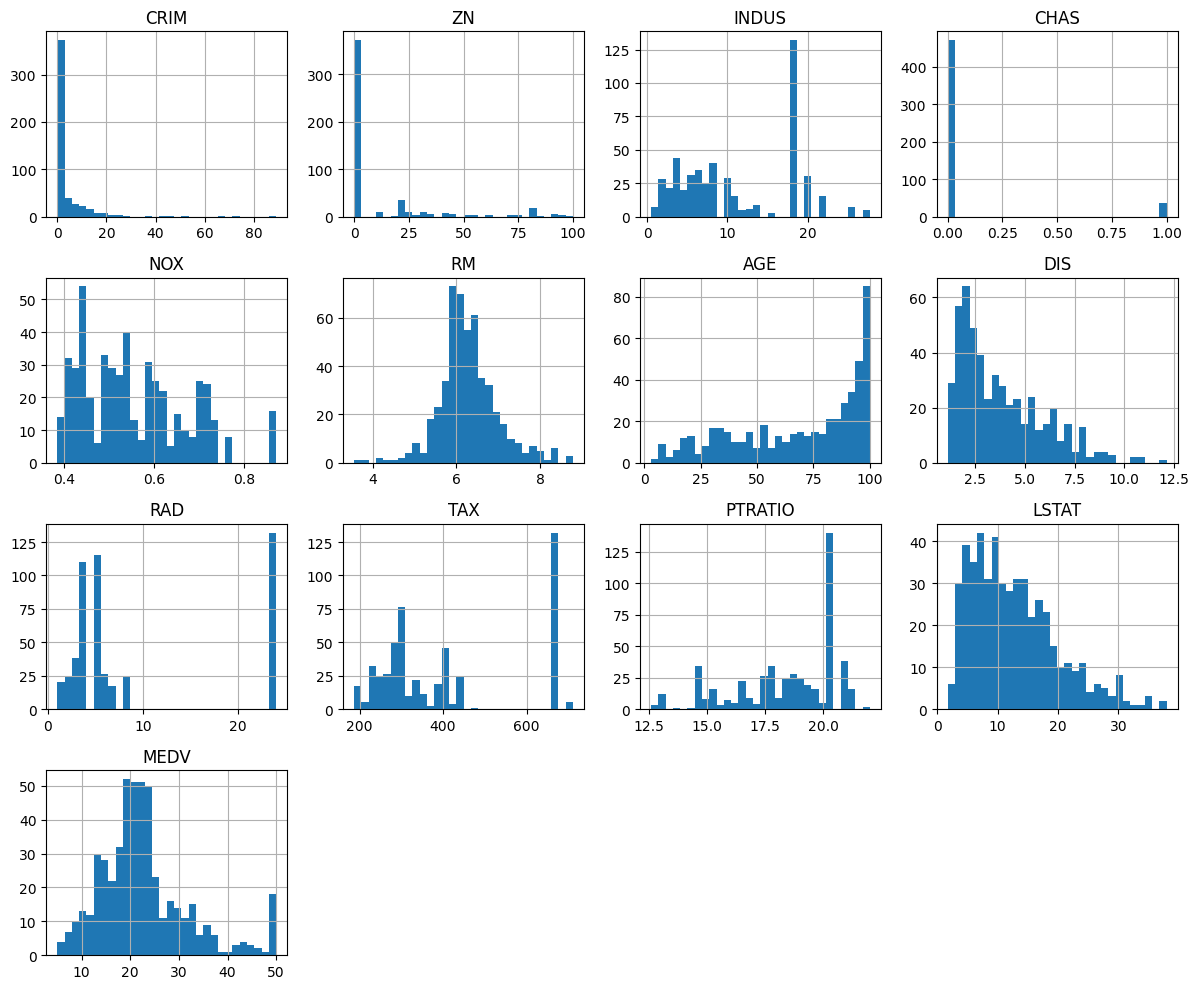

In [11]:
import matplotlib.pyplot as plt

boston_df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


## Task 2 - Generate Descriptive Statistics and Visualizations

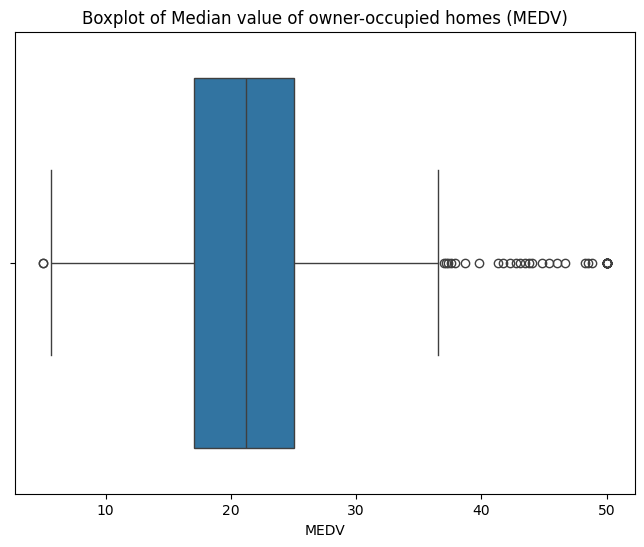

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title("Boxplot of Median value of owner-occupied homes (MEDV)")
plt.show()

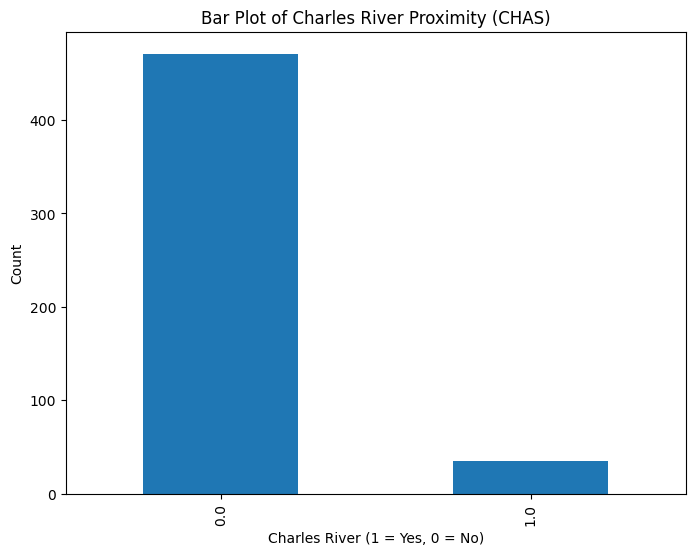

In [13]:
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title("Bar Plot of Charles River Proximity (CHAS)")
plt.xlabel("Charles River (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

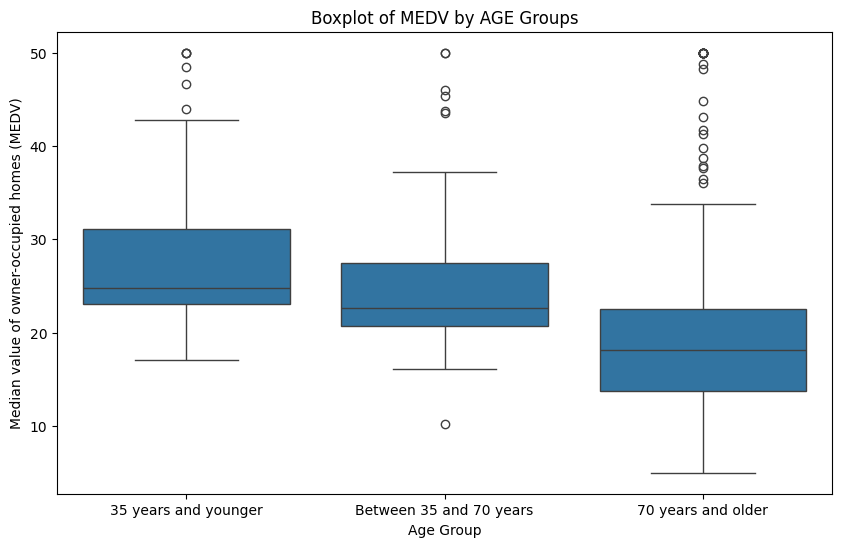

In [14]:
age_bins = [0, 35, 70, 100]
age_labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

# Boxplot for 'MEDV' vs AGE groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title("Boxplot of MEDV by AGE Groups")
plt.xlabel("Age Group")
plt.ylabel("Median value of owner-occupied homes (MEDV)")
plt.show()

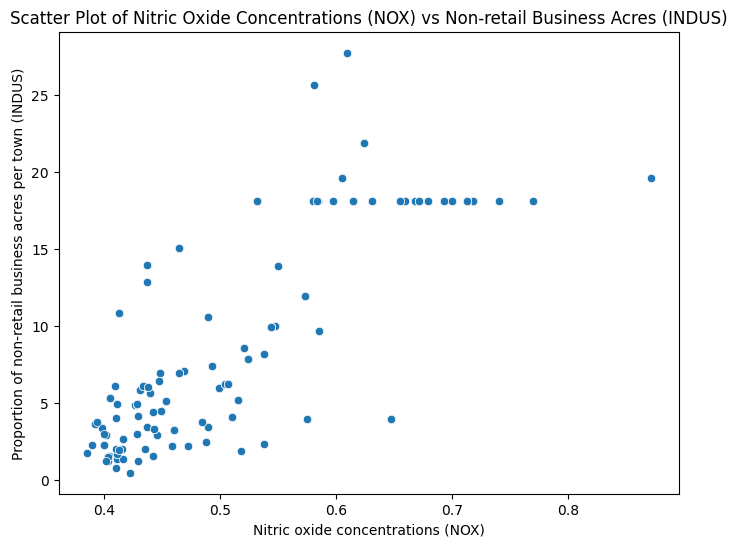

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(y=boston_df['INDUS'], x=boston_df['NOX'])
plt.title("Scatter Plot of Nitric Oxide Concentrations (NOX) vs Non-retail Business Acres (INDUS)")
plt.ylabel("Proportion of non-retail business acres per town (INDUS)")
plt.xlabel("Nitric oxide concentrations (NOX)")
plt.show()

__There seems to be a linear relationship although it starts to get weaker from NOX = 0.6 onwards__

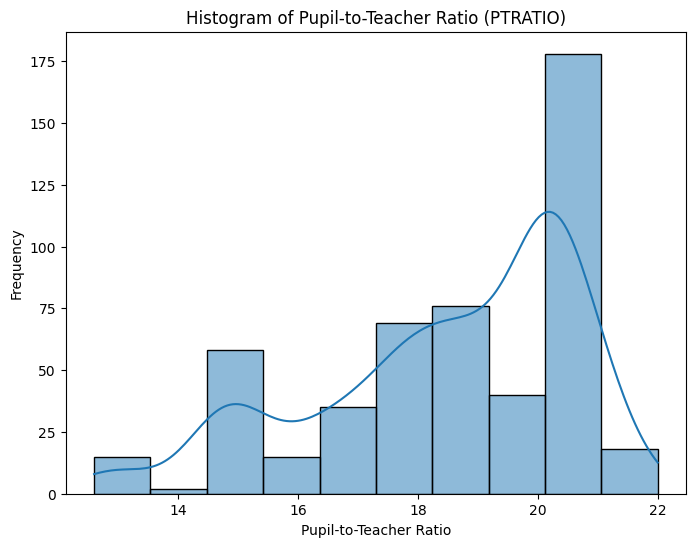

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
plt.title("Histogram of Pupil-to-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-to-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

## Task 3: Use the appropriate tests to answer the questions provided

__Is there a significant difference in median value of houses bounded by the Charles river or not? T-test for independent samples__

Null hypthesis: H0 = Both average MEDV are the same regardless of whether it is bounded by the Charles river or not?

Alternative Hypothesis H1 = Both average MEDV are not the same.

__Levene's Test__

In [19]:
from scipy.stats import levene

group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

stat, p_value = levene(group1, group2)

print(f"Levene's test statistic: {stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Variances are significantly different. Use 'equal_var=False' in the t-test.")
else:
    print("Variances are not significantly different. You can assume equal variances and use 'equal_var=True' in the t-test.")


Levene's test statistic: 4.590342218715871
P-value: 0.03263097600633006
Variances are significantly different. Use 'equal_var=False' in the t-test.


In [20]:
from scipy.stats import ttest_ind

group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Assuming unequal variances

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles River.")


T-statistic: 3.113291312794837
P-value: 0.003567170098137517
There is a significant difference in the median value of houses bounded by the Charles River.


__Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)__

Null Hypothesis H0: μ1 = μ2 = μ3 

Alternative Hypothesis H1: At least one of the mean is different 

In [24]:
import pandas as pd
from scipy.stats import f_oneway

boston_df.loc[(boston_df["AGE"] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70), 'age_group'] = '70 years and older'

group1 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
group3 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_stat, p_value = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in MEDV between the age groups as the p-value is less than 0.05.")
    print("Therefore, we have enough evidence to reject the null hypothesis")
else:
    print("There is no significant difference in MEDV between the age groups.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
There is a significant difference in MEDV between the age groups as the p-value is less than 0.05.
Therefore, we have enough evidence to reject the null hypothesis


__Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)__

Null Hypothesis (H0): There is no linear relationship betwwen Nitric Oxide concentrations and the proportion of non-retail business acres per town.

Alternative Hypothesis (H1): There is a linear relationship between Nitric Oxide concentrations and the proportion of non-retail buisness acres per town

In [26]:
from scipy.stats import pearsonr

nox = boston_df['NOX']
indus = boston_df['INDUS']

corr_coeff, p_value = pearsonr(nox, indus)

print(f"Pearson Correlation Coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant linear relationship between NOX and INDUS as the p-value is less than 0.05.")
else:
    print("There is no significant linear relationship between NOX and INDUS.")

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
There is a significant linear relationship between NOX and INDUS as the p-value is less than 0.05.


__What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)__

Null Hypothesis H0 : Weighted distances to 5 Boston employment centres do not impact the median value

Alternative Hypothesis H1: Weighted distances to 5 Boston employment centres do impact the median value

In [27]:
import statsmodels.api as sm

X = boston_df['DIS']  
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        18:49:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [29]:
import numpy as np
np.sqrt(0.062)

0.24899799195977465

R value of 0.25 shows that there is a weak positive correlation between the 2 variables.

As p-value is 0, we can reject the null hypothesis. This means that there is a statistically significant relationship between the weighted distance to employment centers and the median value of owner-occupied homes. 